# Análisis Estadístico de Incidencia Delictiva en la Ciudad de México

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('carpetas-de-investigacion-pgj-cdmx.csv')

In [3]:
df['año_hechos'] = df['año_hechos'].dropna()
df['alcaldia_hechos'] = df['alcaldia_hechos'].fillna(value='NA')

In [4]:
df['año_hechos'] = pd.to_numeric(df['año_hechos'], downcast='integer')

In [5]:
df_short = df.loc[df['año_hechos'].isin(range(2016, 2020))]

In [6]:
dfs = []
for y in range(2016, 2020):
    temp = df_short.loc[df['año_hechos'] == y]
    print(f'{y}: {len(temp)}')
    dfs.append(temp)

2016: 194085
2017: 225472
2018: 249585
2019: 113415


In [7]:
df_group_year = df_short.groupby(by='año_hechos').count()
df_group_year

mes_hechos  fecha_hechos  delito  categoria_delito  fiscalía  \
año_hechos                                                                 
2016.0          194085        194085  194085            194085    194085   
2017.0          225472        225472  225472            225472    225472   
2018.0          249585        249585  249585            249585    249585   
2019.0          113415        113415  113415            113415    113415   

            agencia  unidad_investigacion  colonia_hechos  alcaldia_hechos  \
año_hechos                                                                   
2016.0       194085                193896          186603           194085   
2017.0       225472                225472          216195           225472   
2018.0       249585                249585          240020           249585   
2019.0       113415                113415          109569           113415   

            fecha_inicio  mes_inicio  ao_inicio  calle_hechos  calle_hechos2  \
año_hechos                                                                     
2016.0            194085      194085     194085        193531          89573   
2017.0            225472      225472     225472        224852          92744   
2018.0            249585      249585     249585        248710          95226   
2019.0            113415      113415     113415        113194          43389   

            longitud  latitud  Geopoint  
año_hechos                               
2016.0        186718   186718    186718  
2017.0        216622   216622    216622  
2018.0        240241   240241    240241  
2019.0        109569   109569    109569

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9
plt.style.use('fivethirtyeight')

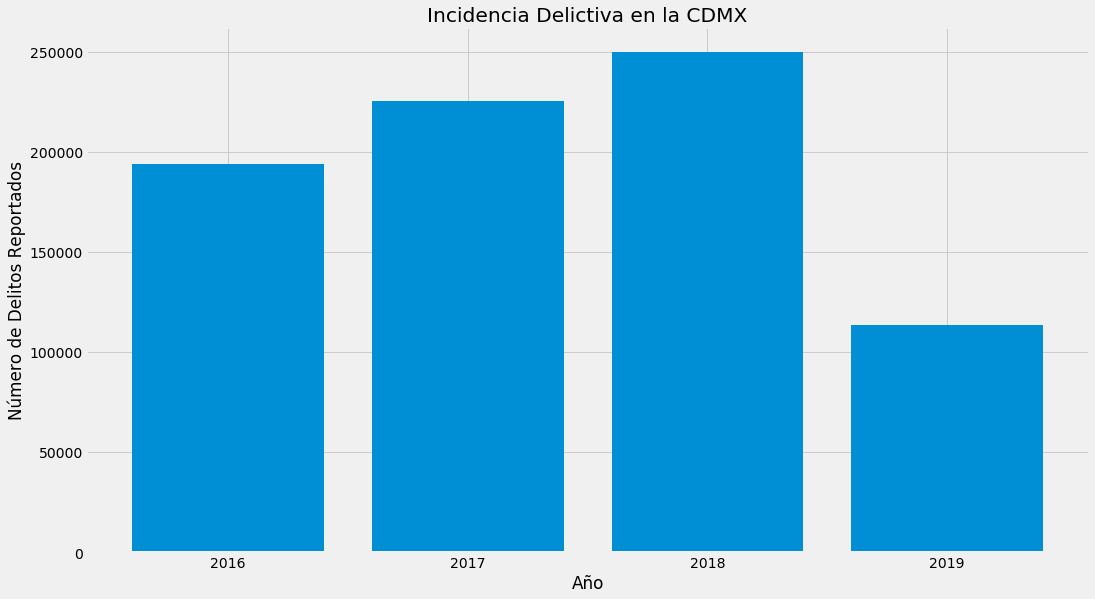

In [9]:
plt.bar(range(2016, 2020), df_group_year['mes_hechos'])
plt.xticks(range(2016, 2020), range(2016, 2020))
plt.xlabel('Año')
plt.ylabel('Número de Delitos Reportados')
plt.title('Incidencia Delictiva en la CDMX')
plt.show()

<em>a. ¿Cuál es el año más delictivo?</em>

El año más delictivo hasta el final del conjunto de datos fue el 2018

In [10]:
df_group_zones = df_short.groupby(by='alcaldia_hechos').count()
df_group_zones = df_group_zones.sort_values(by='año_hechos', ascending=False)
df_group_zones


año_hechos  mes_hechos  fecha_hechos  delito  \
alcaldia_hechos                                                      
CUAUHTEMOC                124024      124024        124024  124024   
IZTAPALAPA                117217      117217        117217  117217   
GUSTAVO A MADERO           78160       78160         78160   78160   
BENITO JUAREZ              68006       68006         68006   68006   
COYOACAN                   52659       52659         52659   52659   
...                          ...         ...           ...     ...   
MARTINEZ DE LA TORRE           1           1             1       1   
ACAMBARO                       1           1             1       1   
MAZATLAN                       1           1             1       1   
MEDELLIN                       1           1             1       1   
MATIAS ROMERO                  1           1             1       1   

                      categoria_delito  fiscalía  agencia  \
alcaldia_hechos                                             
CUAUHTEMOC                      124024    124024   124024   
IZTAPALAPA                      117217    117217   117217   
GUSTAVO A MADERO                 78160     78160    78160   
BENITO JUAREZ                    68006     68006    68006   
COYOACAN                         52659     52659    52659   
...                                ...       ...      ...   
MARTINEZ DE LA TORRE                 1         1        1   
ACAMBARO                             1         1        1   
MAZATLAN                             1         1        1   
MEDELLIN                             1         1        1   
MATIAS ROMERO                        1         1        1   

                      unidad_investigacion  colonia_hechos  fecha_inicio  \
alcaldia_hechos                                                            
CUAUHTEMOC                          124016          119626        124024   
IZTAPALAPA                          117130          112645        117217   
GUSTAVO A MADERO                     78158           75196         78160   
BENITO JUAREZ                        68006           66888         68006   
COYOACAN                             52659           51334         52659   
...                                    ...             ...           ...   
MARTINEZ DE LA TORRE                     1               0             1   
ACAMBARO                                 1               0             1   
MAZATLAN                                 1               0             1   
MEDELLIN                                 1               0             1   
MATIAS ROMERO                            1               0             1   

                      mes_inicio  ao_inicio  calle_hechos  calle_hechos2  \
alcaldia_hechos                                                            
CUAUHTEMOC                124024     124024        123652          49754   
IZTAPALAPA                117217     117217        116807          47762   
GUSTAVO A MADERO           78160      78160         77988          42539   
BENITO JUAREZ              68006      68006         67908          28536   
COYOACAN                   52659      52659         52544          21897   
...                          ...        ...           ...            ...   
MARTINEZ DE LA TORRE           1          1             1              0   
ACAMBARO                       1          1             1              1   
MAZATLAN                       1          1             1              1   
MEDELLIN                       1          1             1              1   
MATIAS ROMERO                  1          1             1              1   

                      longitud  latitud  Geopoint  
alcaldia_hechos                                    
CUAUHTEMOC              119711   119711    119711  
IZTAPALAPA              112718   112718    112718  
GUSTAVO A MADERO         75321    75321     75321  
BENITO JUAREZ            66932    66932     66932  
COYOACAN                 51

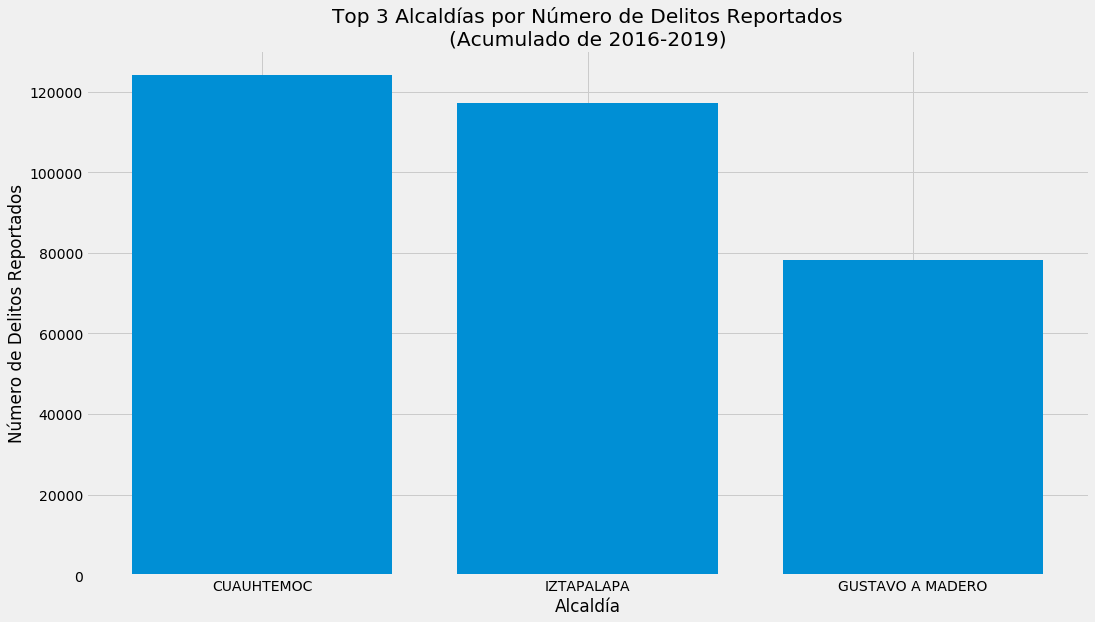

In [11]:
plt.bar(df_group_zones.index[:3], df_group_zones['año_hechos'][:3])
plt.xticks(rotation=0)
plt.xlabel('Alcaldía')
plt.ylabel('Número de Delitos Reportados')
plt.title('Top 3 Alcaldías por Número de Delitos Reportados\n(Acumulado de 2016-2019)')
plt.show()

<em>b. ¿Las tres alcaldías con mayor índice delictivo?</em>

Son las alcaldías: Cuauhtemoc, Iztapalapa y Gustavo A. Madero

In [12]:
#c. ¿Cuál ha sido la tasa de crecimiento del Robo a pasajero en los últimos tres años?

df['categoria_delito'].unique()

array(['DELITO DE BAJO IMPACTO', 'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA',
       'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA',
       'ROBO A REPARTIDOR CON Y SIN VIOLENCIA', 'HOMICIDIO DOLOSO',
       'HECHO NO DELICTIVO', 'ROBO A NEGOCIO CON VIOLENCIA',
       'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
       'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA',
       'ROBO A CASA HABITACIÓN CON VIOLENCIA', 'VIOLACIÓN',
       'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA', 'SECUESTRO'],
      dtype=object)

In [13]:
df_passanger_robbery = df_short.loc[df['categoria_delito'].isin(['ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA', 
                                                                 'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA', 
                                                                 'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA'])]

In [14]:
df_group_passanger_robbery = df_passanger_robbery.groupby(by='año_hechos').count()
df_group_passanger_robbery

mes_hechos  fecha_hechos  delito  categoria_delito  fiscalía  \
año_hechos                                                                 
2016.0            1698          1698    1698              1698      1698   
2017.0            2779          2779    2779              2779      2779   
2018.0            1883          1883    1883              1883      1883   
2019.0            2713          2713    2713              2713      2713   

            agencia  unidad_investigacion  colonia_hechos  alcaldia_hechos  \
año_hechos                                                                   
2016.0         1698                  1698            1681             1698   
2017.0         2779                  2779            2759             2779   
2018.0         1883                  1883            1853             1883   
2019.0         2713                  2713            2679             2713   

            fecha_inicio  mes_inicio  ao_inicio  calle_hechos  calle_hechos2  \
año_hechos                                                                     
2016.0              1698        1698       1698          1694           1165   
2017.0              2779        2779       2779          2767           1991   
2018.0              1883        1883       1883          1869           1046   
2019.0              2713        2713       2713          2677           1160   

            longitud  latitud  Geopoint  
año_hechos                               
2016.0          1681     1681      1681  
2017.0          2759     2759      2759  
2018.0          1854     1854      1854  
2019.0          2679     2679      2679

In [15]:
df_group_passanger_robbery['mes_hechos'].pct_change()

año_hechos
2016.0         NaN
2017.0    0.636631
2018.0   -0.322418
2019.0    0.440786
Name: mes_hechos, dtype: float64

In [16]:
df_group_passanger_robbery['mes_hechos'].pct_change(periods=3)

año_hechos
2016.0         NaN
2017.0         NaN
2018.0         NaN
2019.0    0.597762
Name: mes_hechos, dtype: float64

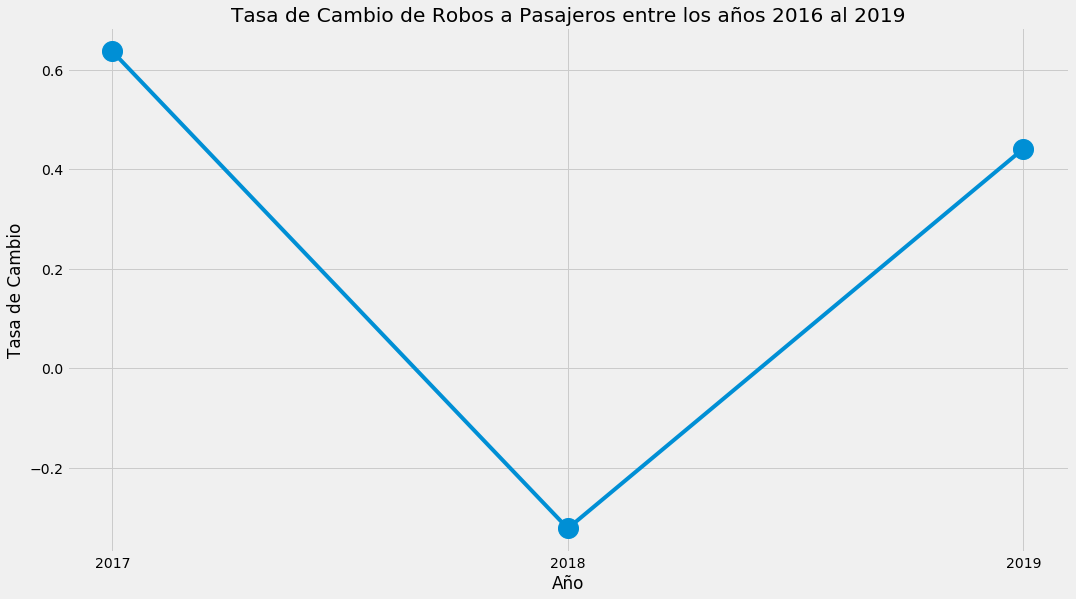

In [17]:
plt.plot(df_group_passanger_robbery['mes_hechos'].pct_change(), marker='o', markersize=20)
plt.xticks(range(2017, 2020), range(2017, 2020))
plt.xlabel('Año')
plt.ylabel('Tasa de Cambio')
plt.title('Tasa de Cambio de Robos a Pasajeros entre los años 2016 al 2019')
plt.show()

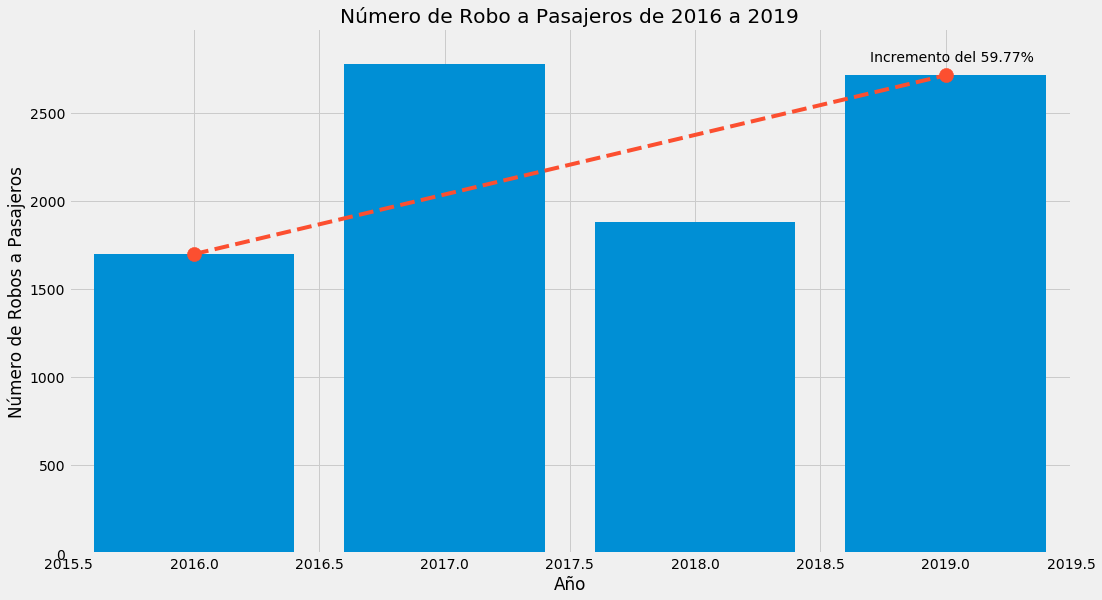

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis([2015.5, 2019.5, 0, df_group_passanger_robbery['mes_hechos'].max() + 200])

start = df_group_passanger_robbery['mes_hechos'].values[0]
end = df_group_passanger_robbery['mes_hechos'].values[-1]
coef = np.polyfit([2016, 2019],[start, end],1)
poly1d_fn = np.poly1d(coef) 
ax.scatter([2016, 2019], [start, end], marker='o', s=200, color='C1', zorder=60)
ax.plot(range(2016, 2020), poly1d_fn([2016, 2017, 2018, 2019]), color='C1', linestyle='--', zorder=10)
ax.bar(range(2016, 2020), df_group_passanger_robbery['mes_hechos'], zorder=2)
ax.set_xticks(range(2016, 2020), range(2016, 2020))
ax.text(2018.7, df_group_passanger_robbery['mes_hechos'].values[-1] + 80, 'Incremento del 59.77%')
ax.set_xlabel('Año')
ax.set_ylabel('Número de Robos a Pasajeros')
ax.set_title('Número de Robo a Pasajeros de 2016 a 2019')
plt.show()

<em>c. ¿Cuál ha sido la tasa de crecimiento del Robo a pasajero en los últimos tres años?</em>

El incremento entre el año 2016 y 2019 fue del 59.77%. El incremento entre años fue del 63.66% para 2017, -32.24% para el 2018 y 44.07% para el 2019.

In [20]:
df_short['categoria_delito'] = df_short['categoria_delito'].astype('category')

In [21]:
df_short = df_short.astype({'fiscalía': 'category', 'agencia': 'category', 'unidad_investigacion': 'category', 'colonia_hechos': 'category', 'alcaldia_hechos': 'category'})

In [22]:
df_short.columns

Index(['año_hechos', 'mes_hechos', 'fecha_hechos', 'delito',
       'categoria_delito', 'fiscalía', 'agencia', 'unidad_investigacion',
       'colonia_hechos', 'alcaldia_hechos', 'fecha_inicio', 'mes_inicio',
       'ao_inicio', 'calle_hechos', 'calle_hechos2', 'longitud', 'latitud',
       'Geopoint'],
      dtype='object')

In [23]:
import seaborn as sn

In [24]:
top_alcaldias = df_group_zones.index[:10]

In [25]:
df_top_alcaldias = df_short.loc[df_short['alcaldia_hechos'].isin(top_alcaldias)]
crosstab_delito_alcaldia = pd.crosstab(df_top_alcaldias.categoria_delito, df_top_alcaldias.alcaldia_hechos, normalize='index')

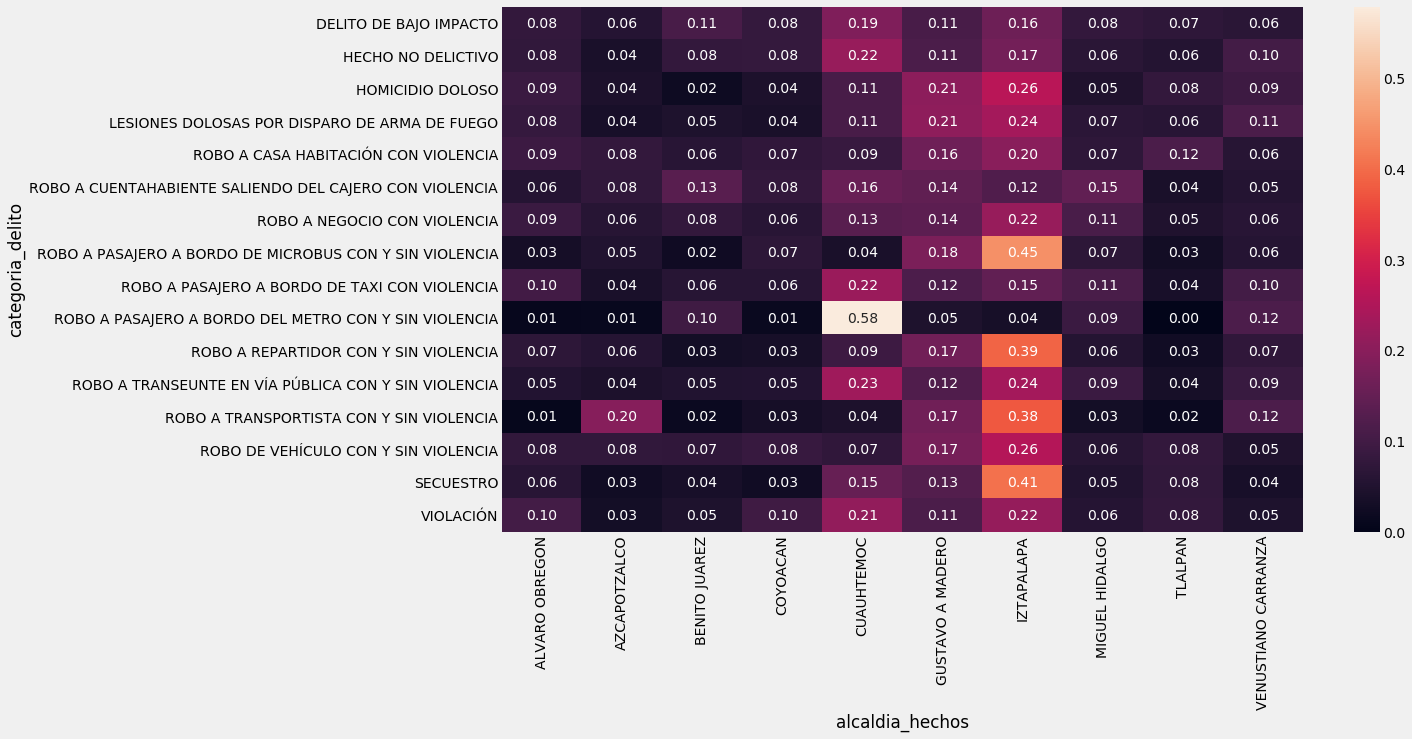

In [26]:
res = sn.heatmap(crosstab_delito_alcaldia, annot=True, fmt='.2f')

In [27]:
crosstab_delito_mes = pd.crosstab(df_top_alcaldias.categoria_delito, df_top_alcaldias.mes_hechos, normalize='index')

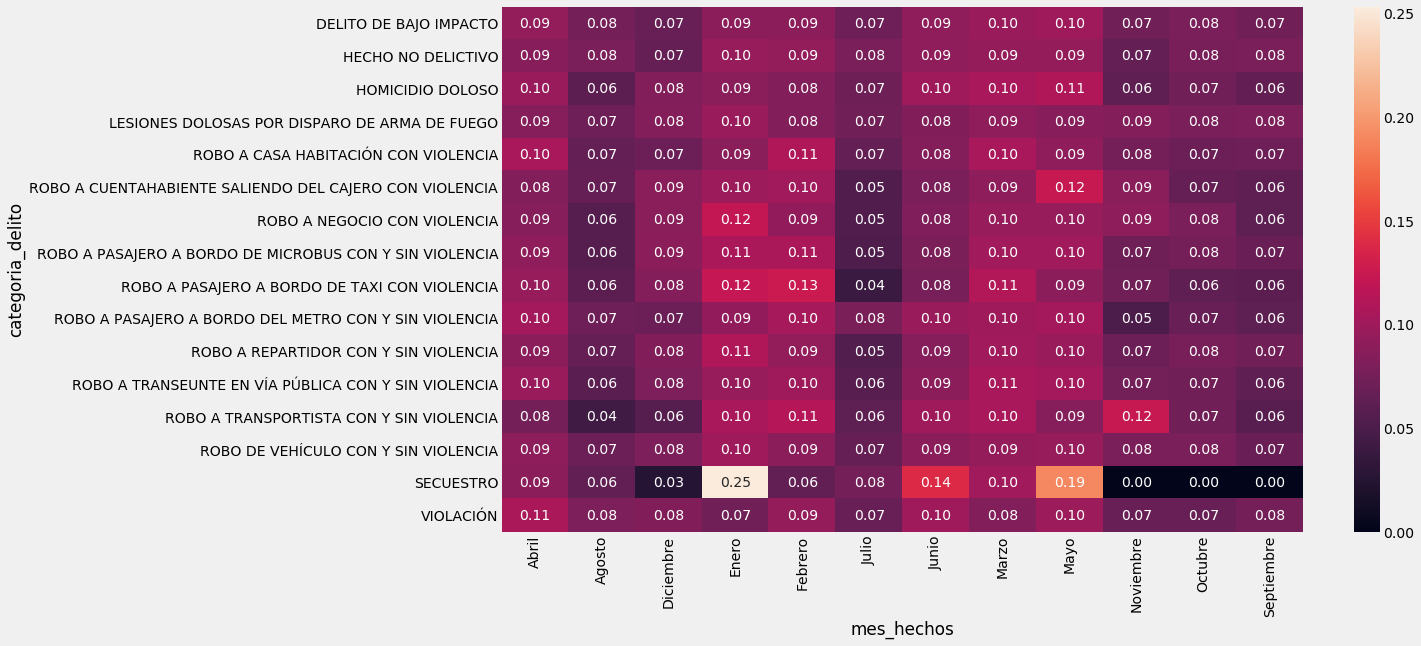

In [28]:
res = sn.heatmap(crosstab_delito_mes, annot=True, fmt='.2f')

In [29]:
crosstab_delito_colonia = pd.crosstab(df_top_alcaldias.categoria_delito, df_top_alcaldias.colonia_hechos, normalize='index')

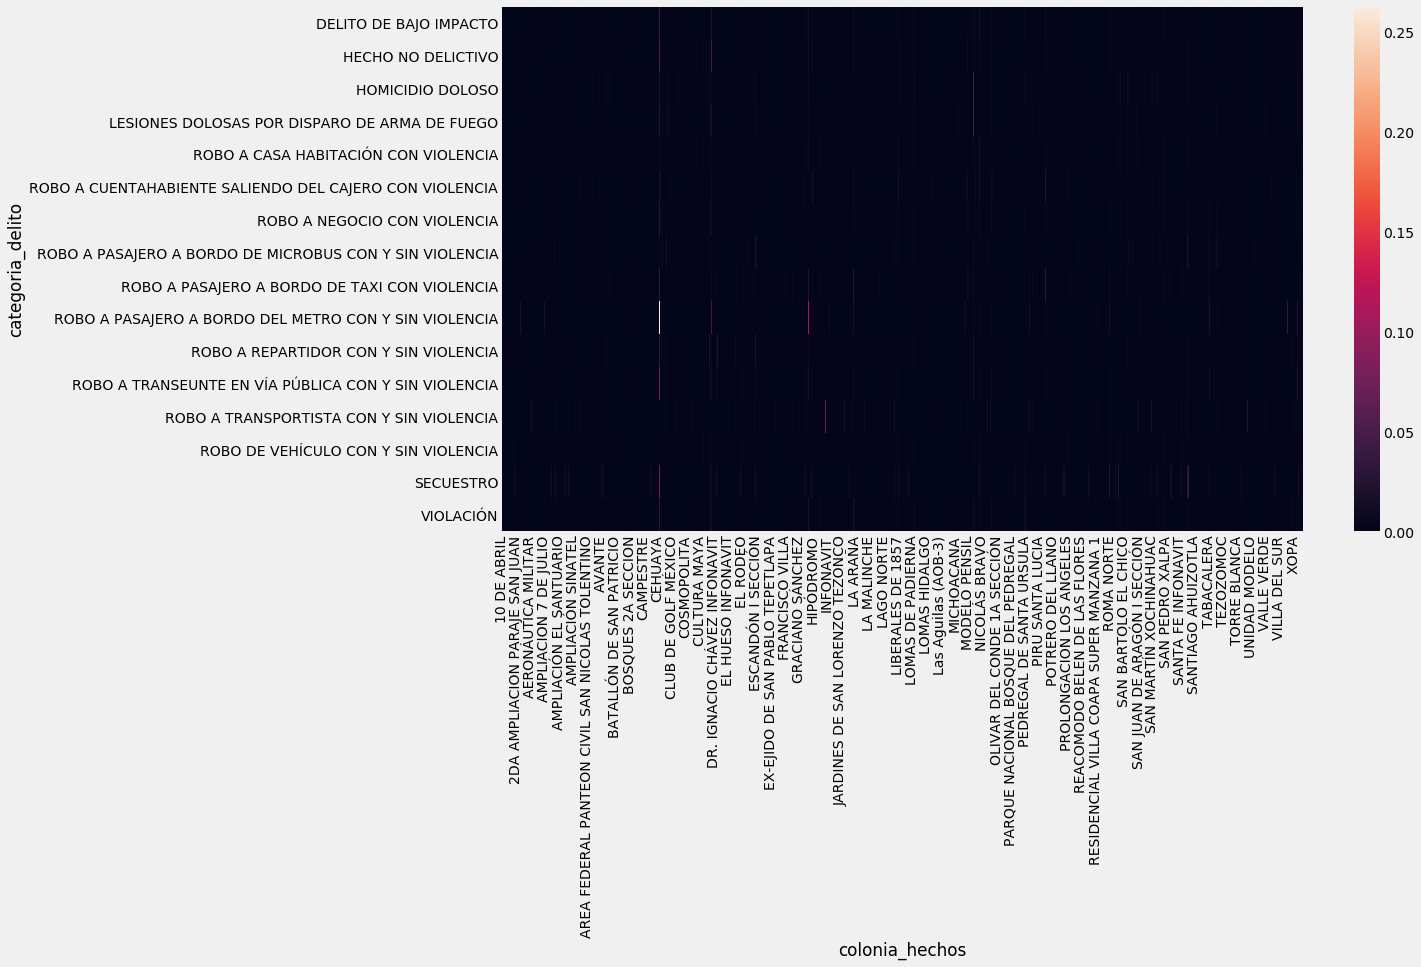

In [30]:
res = sn.heatmap(crosstab_delito_colonia)

<em>e. Da por lo menos 2 insights que te llamen la atención.</em>

El delito de secuestro sucede principalmente en los meses de enero, mayo y junio. El robo en el metro a pasajeros sucede más en la delegación Cuauhtemoc.

In [31]:
import researchpy as rp
import scipy.stats as stats

In [32]:
df_top_alcaldias_corr = df_top_alcaldias.drop(['ao_inicio', 'fecha_hechos', 'fiscalía', 'agencia', 'unidad_investigacion', 'fecha_inicio', 'mes_inicio', 'longitud', 'latitud', 'Geopoint', 'fecha_hechos'], axis=1)

In [56]:
for i in range(len(df_top_alcaldias_corr.columns[:-1])):
    for j in range(i, len(df_top_alcaldias_corr.columns[1:])):
        if i != j:
            crosstab, test_results, expected = rp.crosstab(df_top_alcaldias_corr[df_top_alcaldias_corr.columns[i]], df_top_alcaldias_corr[df_top_alcaldias_corr.columns[j]], test= "chi-square", expected_freqs= True, prop= "cell")
            print(f"{df_top_alcaldias_corr.columns[i]} & {df_top_alcaldias_corr.columns[j]}: {test_results.iloc[2].values[1]}")


año_hechos & mes_hechos: 0.2112
año_hechos & delito: 0.1486
año_hechos & categoria_delito: 0.0775
año_hechos & colonia_hechos: 0.0708
año_hechos & alcaldia_hechos: 0.0171
año_hechos & calle_hechos: 0.4948
mes_hechos & delito: 0.0476
mes_hechos & categoria_delito: 0.0142
mes_hechos & colonia_hechos: 0.0484
mes_hechos & alcaldia_hechos: 0.0071
mes_hechos & calle_hechos: 0.4723
delito & categoria_delito: 1.0
delito & colonia_hechos: 0.0695
delito & alcaldia_hechos: 0.1327
delito & calle_hechos: 0.4977
categoria_delito & colonia_hechos: 0.1019
categoria_delito & alcaldia_hechos: 0.0655
categoria_delito & calle_hechos: 0.4929
colonia_hechos & alcaldia_hechos: 0.9842


<em>d. ¿Qué variables están correlacionadas?</em>

Usando el criterio $\chi^2$ las variables que están altamente correlacionadas son: año_hechos y calle_hechos, mes_hechos y calle_hechos, delito y calle_hechos, categoria_delito y calle_hechos. Se observan otras correlaciones muy altas pero se puede ignorarlas ya que son de esperarse (una colonia no cambia de alcaldía y los delitos siempre caen en las mismas categorías). Se eliminaron variables por suponerse que son coplanares (año_hechos y fecha_hechos por ejemplo).

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [34]:
df_tlalpan = df_short.loc[df_short['alcaldia_hechos'] == 'TLALPAN']

In [35]:
df_group_tlalpan = df_tlalpan.groupby(by='año_hechos').count()
df_group_tlalpan


mes_hechos  fecha_hechos  delito  categoria_delito  fiscalía  \
año_hechos                                                                 
2016.0           11574         11574   11574             11574     11574   
2017.0           12593         12593   12593             12593     12593   
2018.0           14211         14211   14211             14211     14211   
2019.0            6456          6456    6456              6456      6456   

            agencia  unidad_investigacion  colonia_hechos  alcaldia_hechos  \
año_hechos                                                                   
2016.0        11574                 11572           11235            11574   
2017.0        12593                 12593           12259            12593   
2018.0        14211                 14211           13843            14211   
2019.0         6456                  6456            6320             6456   

            fecha_inicio  mes_inicio  ao_inicio  calle_hechos  calle_hechos2  \
año_hechos                                                                     
2016.0             11574       11574      11574         11549           4488   
2017.0             12593       12593      12593         12566           4368   
2018.0             14211       14211      14211         14169           4146   
2019.0              6456        6456       6456          6449           1831   

            longitud  latitud  Geopoint  
año_hechos                               
2016.0         11262    11262     11262  
2017.0         12339    12339     12339  
2018.0         13856    13856     13856  
2019.0          6320     6320      6320

In [36]:
X, y = df_group_tlalpan.index.values, df_group_tlalpan['mes_hechos'].values

In [37]:
linear = LinearRegression()

In [38]:
linear.fit(X[:-1].reshape(-1, 1), y[:-1])

LinearRegression()

In [39]:
ypred = linear.predict(np.array([2020]).reshape(1, -1))
yprior = linear.predict(np.array([2016, 2017, 2018, 2019, 2020]).reshape(-1, 1))
y2019 = linear.predict(np.array([2019]).reshape(1, -1))

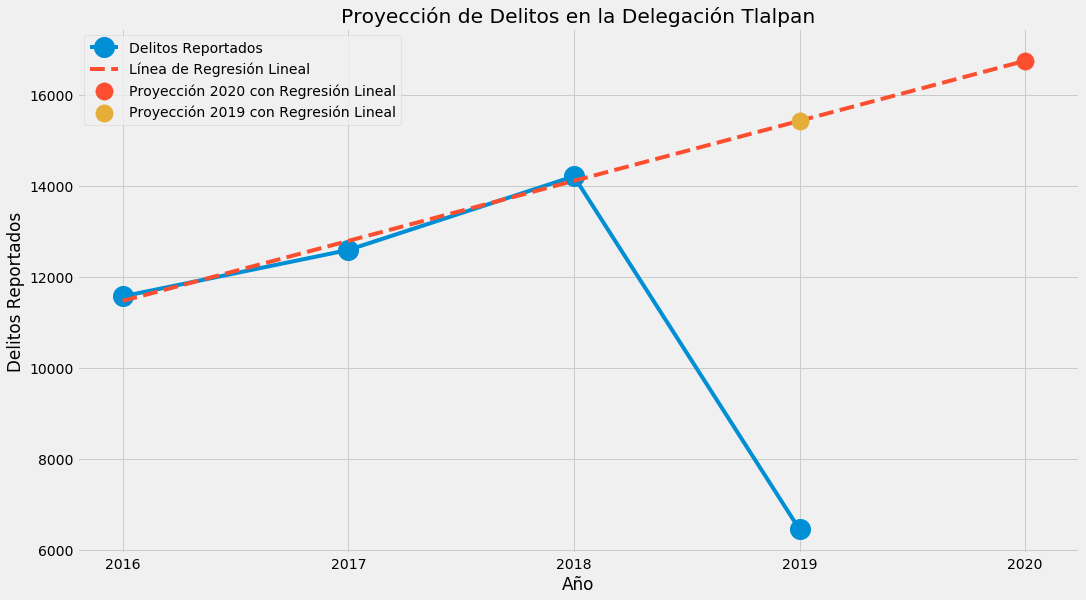

In [40]:
plt.plot(X, y, marker='o', markersize=20, label='Delitos Reportados')
plt.plot([2016, 2017, 2018, 2019, 2020], yprior, ls='--', label='Regresión Lineal')
plt.scatter([2020], ypred, s=300, c='C1', label='Proyección 2020 con Regresión Lineal')
plt.scatter([2019], y2019, s=300, c='C2', zorder=30, label='Proyección 2019 con Regresión Lineal')
plt.xticks(range(2016, 2021), range(2016, 2021))
plt.legend()
plt.xlabel('Año')
plt.ylabel('Delitos Reportados')
plt.title('Proyección de Delitos en la Delegación Tlalpan')
plt.show()

In [41]:
ridge = make_pipeline(PolynomialFeatures(3), Ridge())

In [42]:
ridge.fit(X[:-1].reshape(-1, 1), y[:-1])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [43]:
ypred_r = ridge.predict(np.array([2020]).reshape(1, -1))
yprior_r = ridge.predict(np.array([2016, 2017, 2018, 2019, 2020]).reshape(-1, 1))
y2019_r = ridge.predict(np.array([2019]).reshape(1, -1))

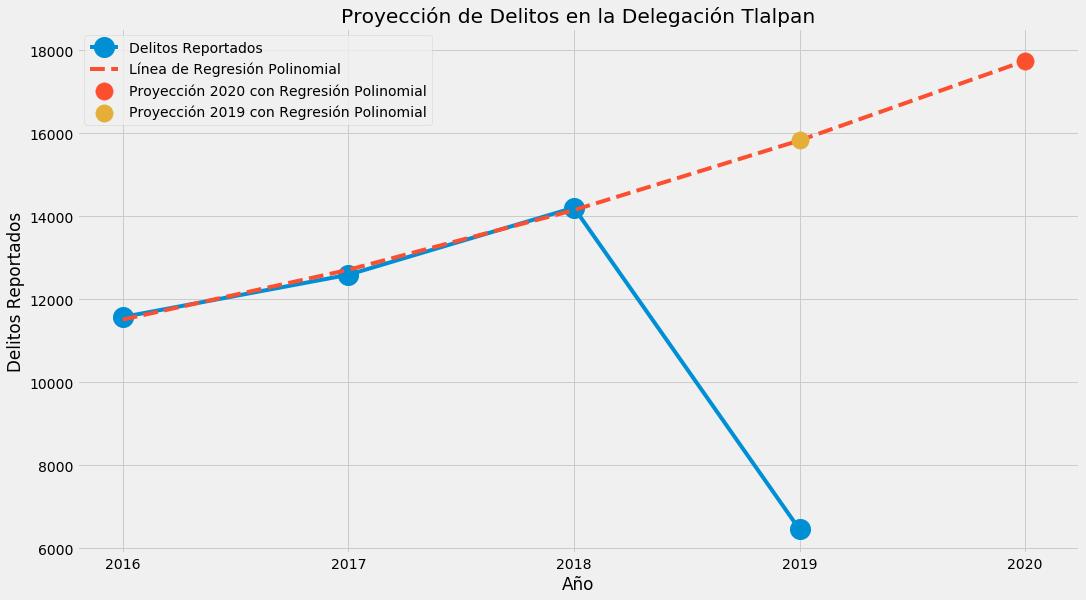

In [44]:
plt.plot(X, y, marker='o', markersize=20, label='Delitos Reportados')
plt.plot([2016, 2017, 2018, 2019, 2020], yprior_r, ls='--', label='Regresión Polinomial')
plt.scatter([2020], ypred_r, s=300, c='C1', label='Proyección 2020 con Regresión Polinomial')
plt.scatter([2019], y2019_r, s=300, c='C2', zorder=30, label='Proyección 2019 con Regresión Polinomial')
plt.xticks(range(2016, 2021), range(2016, 2021))
plt.xlabel('Año')
plt.ylabel('Delitos Reportados')
plt.title('Proyección de Delitos en la Delegación Tlalpan')
plt.legend()
plt.show()

<em>a. ¿Cuál será el crecimiento delictivo en la alcaldía Tlalpan el próximo año?</em>

De acuerdo a los modelos, el crecimiento delictivo en la alcaldía Tlalpan puede incrementarse entre 2,200 a 4,000 delitos con respecto al 2018. No se considera 2019 debido a que los datos reportados de ese año no son completos.

In [98]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt


In [133]:
#todo: checa por qué está saliendo el error de que sort_values no tiene argumento key
# vas a ir formando las series de tiempo de cada alcaldía, si ves que son muchos puedes usar PSR, si no, ARIMA
#luego eso lo haces para todas las colonias
#tienes que reportar la que se prediga que va a tener mayor cantidad de delitos en marzo 2020

import warnings
warnings.filterwarnings('ignore')

def compare_forecast(forecast, name, highest_count, highest_count_name):
    if forecast > highest_count:
        highest_count_name = name
        highest_count = forecast
    return highest_count, highest_count_name


def forecast_area(column_name, alcaldia=None):
    custom_dict = {'Enero': 0, 'Febrero': 1, 'Marzo': 2, 'Abril': 3, 'Mayo': 4, 'Junio': 5, 'Julio': 6, 'Agosto': 7, 'Septiembre': 8, 'Octubre': 9, 'Noviembre': 10, 'Diciembre': 11} 

    highest_count_arima = -np.inf
    highest_area_arima = ''

    highest_count_holt = -np.inf
    highest_area_holt = ''

    for area in df_short[column_name].unique():
        ts = np.array([])
        for y in range(2016, 2020):
            temp = None
            if alcaldia is None:
                temp = df_short.loc[(df_short[column_name] == area) & (df_short['año_hechos'] == y)].groupby(by='mes_hechos').count()
            else:
                temp = df_short.loc[(df_short[column_name] == area) & (df_short['año_hechos'] == y) & (df_short['alcaldia_hechos'] == alcaldia)].groupby(by='mes_hechos').count()
            temp.reset_index(inplace=True)
            temp = temp.sort_values(by='mes_hechos', key=lambda x: x.map(custom_dict))
            ts = np.concatenate((ts, temp['año_hechos'].values))
        ts = ts.ravel()
        model_auto = None
        if len(ts) == 42:
            try:
                model_auto = pm.auto_arima(ts, d=1, D=1, seasonal=True, m=12, trend='c', start_p=0, start_q=0, max_order=6, test='adf', stepwise=True, trace=False)
            except:
                model_auto = pm.auto_arima(ts, d=1, D=0, seasonal=True, m=12, trend='c', start_p=0, start_q=0, max_order=6, test='adf', stepwise=True, trace=False)
            model = SARIMAX(ts,order=model_auto.order, seasonal_order=model_auto.seasonal_order)
            results = model.fit()
            forecast_arima = results.get_forecast(steps=9)
            forecast_march_arima = forecast_arima.predicted_mean[-1]
            highest_count_arima, highest_area_arima = compare_forecast(forecast_march_arima, area, highest_count_arima, highest_area_arima)

            model_holt = Holt(ts)
            fit_holt = model_holt.fit(smoothing_level=.5, smoothing_slope=.2)
            forecast_holt = fit_holt.forecast(9)
            forecast_march_holt = forecast_holt[-1]
            highest_count_holt, highest_area_holt = compare_forecast(forecast_march_holt, area, highest_count_holt, highest_area_holt)
    print(f'ARIMA: {highest_area_arima}: {highest_count_arima}')
    print(f'HOLT-WINTERS: {highest_area_arima}: {highest_count_holt}')

In [134]:
forecast_area('alcaldia_hechos')

ARIMA: IZTAPALAPA: 2742.2890414576773
HOLT-WINTERS: IZTAPALAPA: 2400.9055613580213


In [135]:
custom_dict = {'Enero': 0, 'Febrero': 1, 'Marzo': 2, 'Abril': 3, 'Mayo': 4, 'Junio': 5, 'Julio': 6, 'Agosto': 7, 'Septiembre': 8, 'Octubre': 9, 'Noviembre': 10, 'Diciembre': 11} 

highest_count_arima = -np.inf
highest_area_arima = ''

highest_count_holt = -np.inf
highest_area_holt = ''

for area in df_short.loc[df_short['alcaldia_hechos'] == 'IZTAPALAPA']['colonia_hechos'].unique():
    ts = np.array([])
    for y in range(2016, 2020):
        temp = None
        temp = df_short.loc[(df_short['colonia_hechos'] == area) & (df_short['año_hechos'] == y)].groupby(by='mes_hechos').count()            
        temp.reset_index(inplace=True)
        temp = temp.sort_values(by='mes_hechos', key=lambda x: x.map(custom_dict))
        ts = np.concatenate((ts, temp['año_hechos'].values))
    ts = ts.ravel()
    model_auto = None
    if len(ts) == 42:
        try:
            model_auto = pm.auto_arima(ts, d=1, D=1, seasonal=True, m=12, trend='c', start_p=0, start_q=0, max_order=6, test='adf', stepwise=True, trace=False)
        except:
            model_auto = pm.auto_arima(ts, d=1, D=0, seasonal=True, m=12, trend='c', start_p=0, start_q=0, max_order=6, test='adf', stepwise=True, trace=False)
        model = SARIMAX(ts,order=model_auto.order, seasonal_order=model_auto.seasonal_order)
        results = model.fit()
        forecast_arima = results.get_forecast(steps=9)
        forecast_march_arima = forecast_arima.predicted_mean[-1]
        highest_count_arima, highest_area_arima = compare_forecast(forecast_march_arima, area, highest_count_arima, highest_area_arima)

        model_holt = Holt(ts)
        fit_holt = model_holt.fit(smoothing_level=.5, smoothing_slope=.2)
        forecast_holt = fit_holt.forecast(9)
        forecast_march_holt = forecast_holt[-1]
        highest_count_holt, highest_area_holt = compare_forecast(forecast_march_holt, area, highest_count_holt, highest_area_holt)
print(f'ARIMA: {highest_area_arima}: {highest_count_arima}')
print(f'HOLT-WINTERS: {highest_area_arima}: {highest_count_holt}')

ARIMA: BUENAVISTA: 160.8667181817575
HOLT-WINTERS: BUENAVISTA: 119.45121348843094


<em>b. ¿Cuál será la colonia y alcaldía con más delitos en marzo del año siguiente?</em>

La alcaldía que se pronostica tendrá más delitos en marzo es Iztapalapa. La colonia con más delitos se pronostica que sea la colonia Buenavista.

<em>c. ¿Crees que disminuya la delincuencia en los próximos 8 meses?</em>

De acuerdo a lo observado en los datos no se puede suponer que disminuya la delincuencia en los próximos 8 meses.